# Overview
Continuing with the previous notebook, try other algorithms and hyperparameters to improve the model.

| | |
| --------- | --------------------------- |
| Notebook  | 4_AlgorithmsTuning.ipynb    |
| Builds On | ModelTrain |
| Time to complete | 20 minutes

Execute the first code cell to load the data and prepare the model and train with linear regression. (results of the previous notebook)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression  # this is your ALGORITHM
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error

df = pd.read_pickle('tripdata.pkl')
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df.duration > 1) & (df.duration < 60)]
#sns.histplot(df['duration'])
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)


train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)  # All of my features in a sparse matrix (0's and 1's)

target = 'duration'   # this is my y value... what I'm trying to predict
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)


7.226738834844508

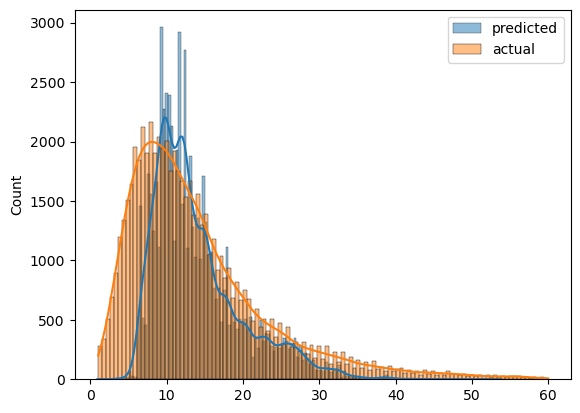

In [2]:

sns.histplot(y_pred, label='predicted', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend()

### Ridge Regression
Ridge regression is a linear regression model with L2 regularization. The regularization term is the L2 norm of the weights vector. The regularization term is multiplied by the regularization strength, alpha. The regularization strength is a hyperparameter that controls how much the model is regularized. The higher the value of alpha, the more the model is regularized.

In [5]:
# try different alpha values
lr = Ridge(alpha=1)
# see code above for LinearRegression to fit the model with Ridge and show the RMSE
lr.fit(X_train, y_train)
lr.score(X_train, y_train)


0.4004208806911216

In [6]:
rmse = root_mean_squared_error(y_train, y_pred)
rmse

7.226738834844508

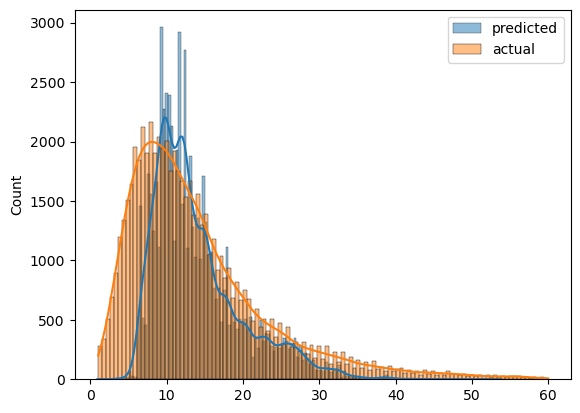

In [7]:
sns.histplot(y_pred, label='predicted', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend()

### Lasso Regression
Lasso regression is a linear regression model with L1 regularization. The regularization term is the L1 norm of the weights vector. The regularization term is multiplied by the regularization strength, alpha. The regularization strength is a hyperparameter that controls how much the model is regularized. The higher the value of alpha, the more the model is regularized.

In [8]:
# try different hyperparameters
lr = Lasso(.01)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse
# see code above for LinearRegression to fit the model with Lasso and show the RMSE

7.226738834844508

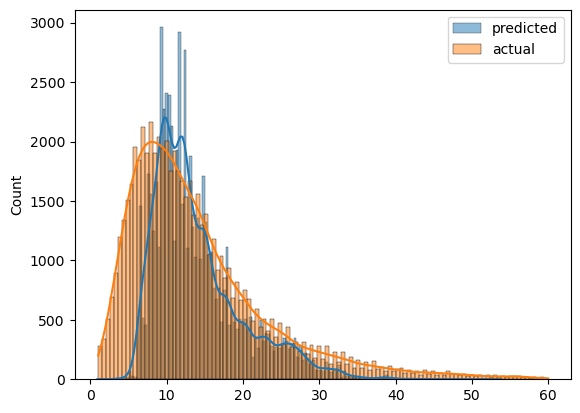

In [10]:
sns.histplot(y_pred, label='predicted', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend()